In [1]:
!pip install folium

In [2]:
#zip 파일 압축 해제
import zipfile
import pandas as pd
import os

file_location = os.getcwd()
zip_path = os.path.join(file_location, 'bicycle_rental_n_return', 'month total.zip')
extract_path = os.path.join(file_location, 'bicycle_rental_n_return', 'month total')

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

csv_files = sorted([f for f in os.listdir(extract_path) if f.endswith('.csv')])
print(csv_files)

['mainApr.csv', 'mainAug.csv', 'mainDec.csv', 'mainFeb.csv', 'mainJan.csv', 'mainJul.csv', 'mainJun.csv', 'mainMar.csv', 'mainMay.csv', 'mainNov.csv', 'mainOct.csv', 'mainSep.csv']


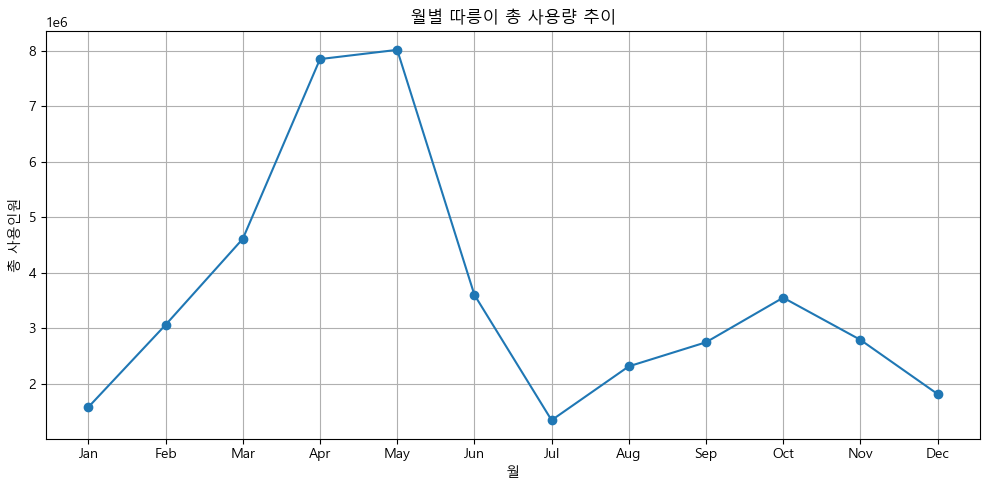

In [3]:
#월별 사용량 추이 그래프 코드
import matplotlib.pyplot as plt

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_total={}

for file in csv_files:
    df = pd.read_csv(os.path.join(extract_path, file), encoding='cp949')
    
    total_usage = df['총_사용인원'].sum()
    month = file.replace("main", "").replace(".csv", "")
    month_total[month] = total_usage
    
totals = [month_total[month] for month in month_order]

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(10, 5))
plt.plot(month_order, totals, marker='o')
plt.title('월별 따릉이 총 사용량 추이')
plt.xlabel('월')
plt.ylabel('총 사용인원')
plt.grid(True)
plt.tight_layout()
plt.show()
#1e6 백만명

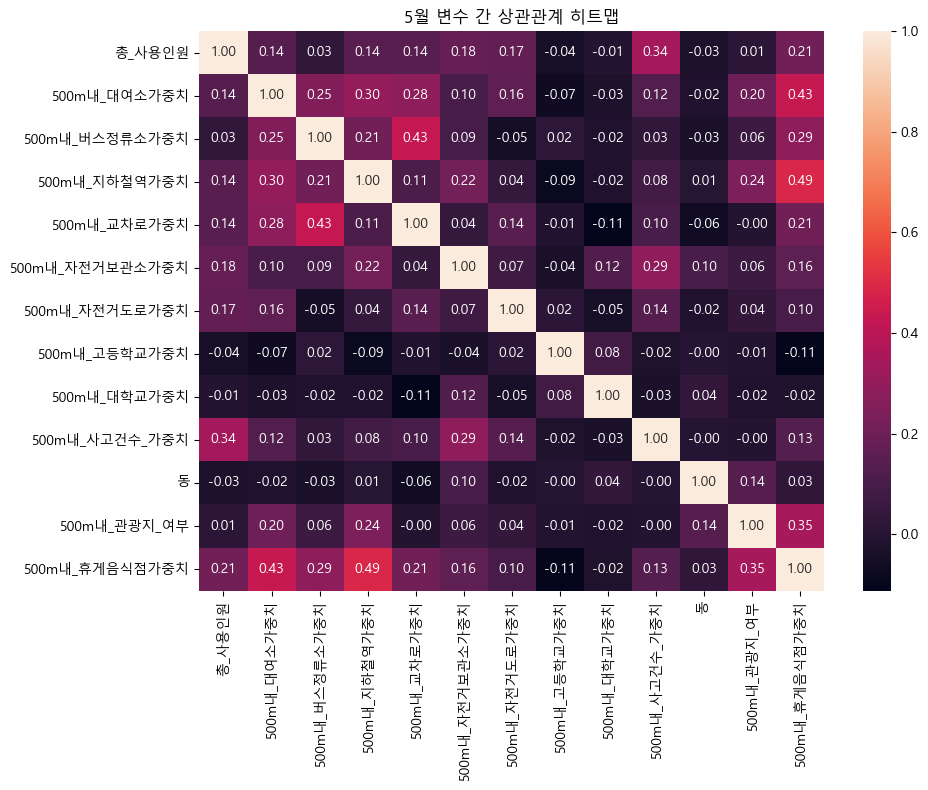

In [4]:
#변수 간 상관관계 히트맵 분석(5월)
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원']
df_may  = df_may[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '대여소_ID']]
merged_may = pd.merge(df_may, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

columns = ['총_사용인원','500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']

available_columns = [col for col in columns if col in merged_may.columns]
df_corr = merged_may[available_columns].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")
plt.title("5월 변수 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

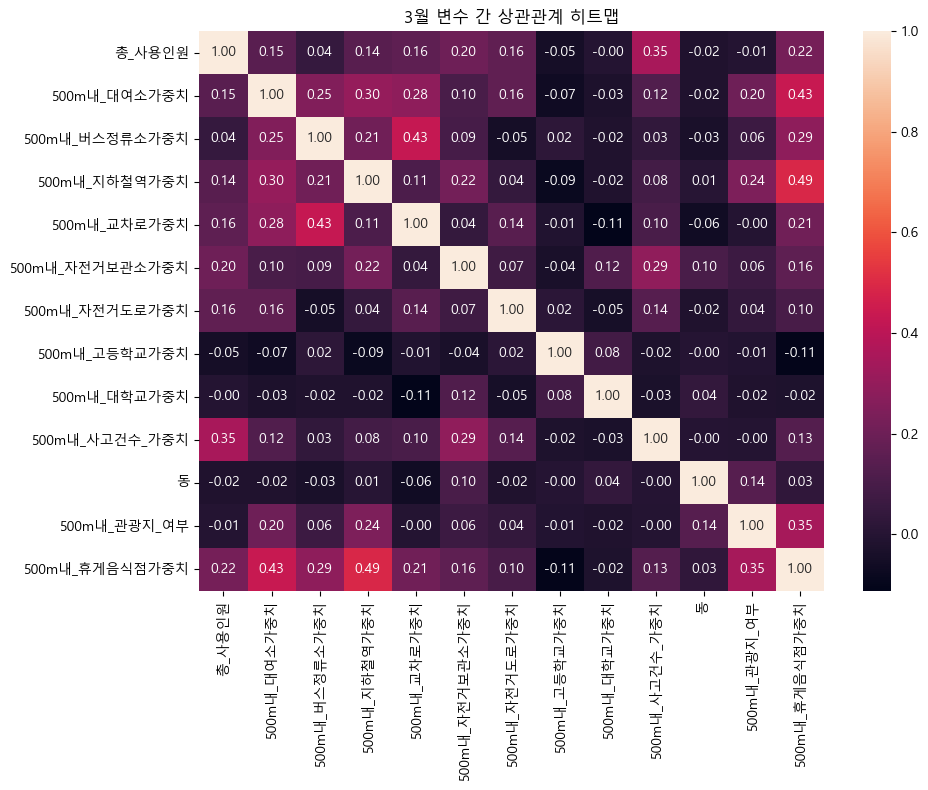

In [5]:
#변수 간 상관관계 히트맵 분석(3월)
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols = ['대여소_ID', '총_사용인원']
df_mar = df_mar[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '대여소_ID']]
merged_mar = pd.merge(df_mar, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

columns = ['총_사용인원','500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']

available_columns = [col for col in columns if col in merged_mar.columns]
df_corr = merged_mar[available_columns].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")
plt.title("3월 변수 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

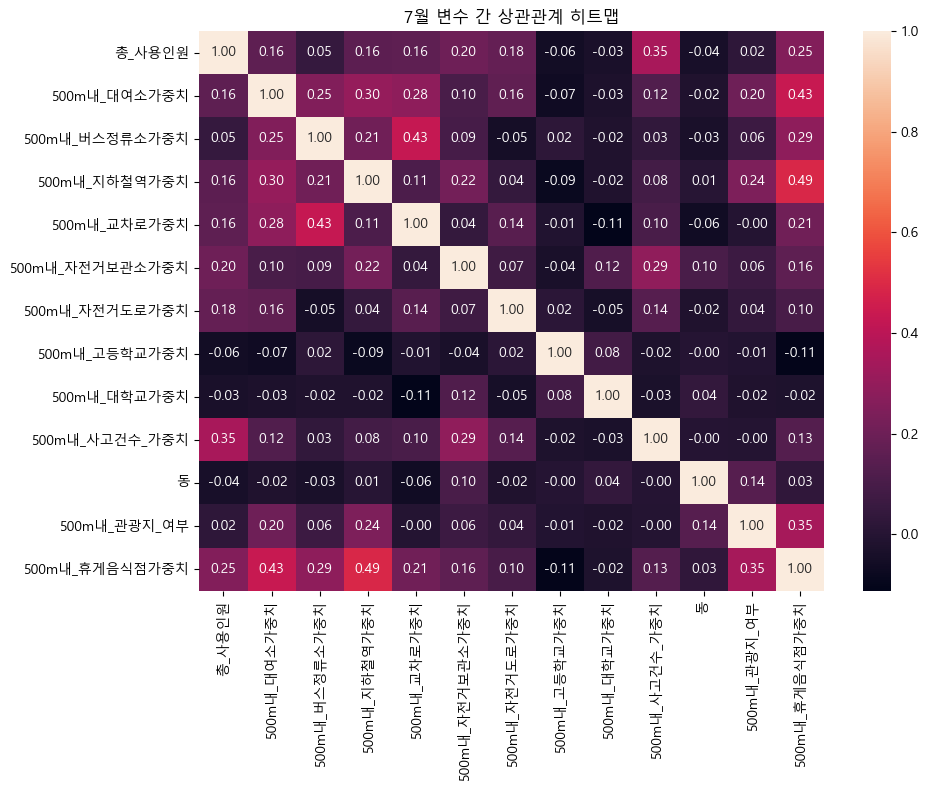

In [6]:
#변수 간 상관관계 히트맵 분석(7월)
import seaborn as sns
import matplotlib.pyplot as plt

filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols = ['대여소_ID', '총_사용인원']
df_jul = df_jul[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '대여소_ID']]
merged_jul = pd.merge(df_jul, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

columns = ['총_사용인원','500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']

available_columns = [col for col in columns if col in merged_jul.columns]
df_corr = merged_jul[available_columns].dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")
plt.title("7월 변수 간 상관관계 히트맵")
plt.tight_layout()
plt.show()

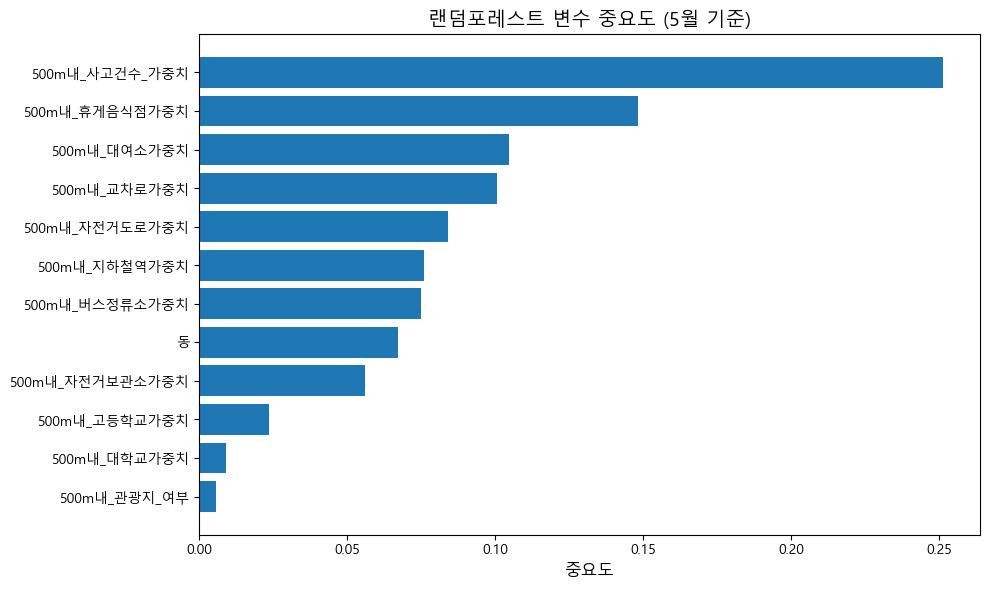

In [7]:
#변수 중요도 시각화 : 랜덤포레스트 기반
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원', '평균_사용인원']
df_may  = df_may[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '평균_사용인원','대여소_ID']]
df_merge = pd.merge(df_may, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

feature_cols = ['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']

X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=300)
rf.fit(X, Y)


importances = rf.feature_importances_
indices = importances.argsort()[::-1]
sorted_features = [feature_cols[i] for i in indices]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], importances[indices][::-1])
plt.title("랜덤포레스트 변수 중요도 (5월 기준)", fontsize=14)
plt.xlabel("중요도", fontsize=12)
plt.tight_layout()
plt.show()

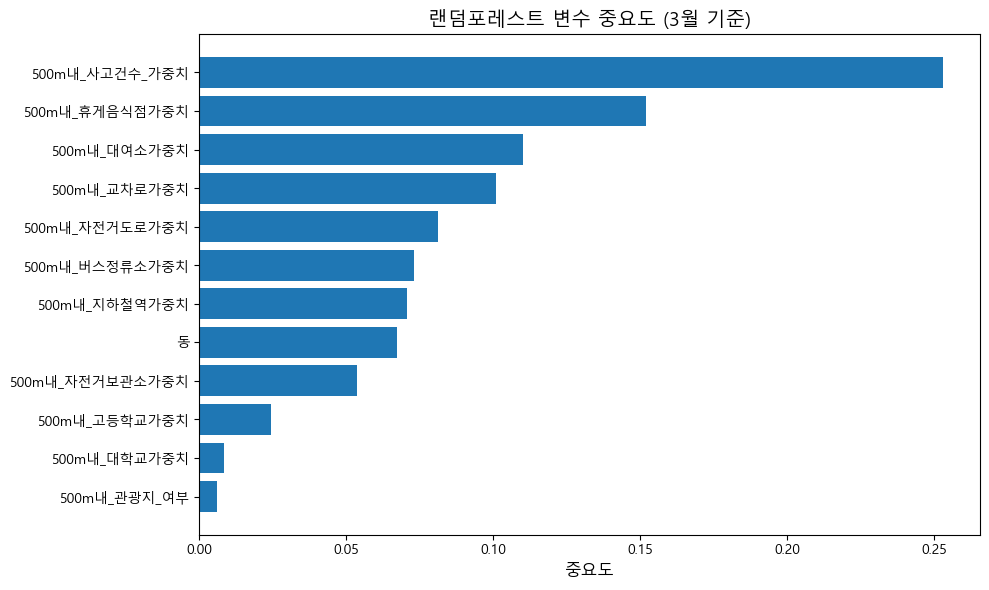

In [8]:
#변수 중요도 시각화 : 랜덤포레스트 기반
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원', '평균_사용인원']
df_mar  = df_mar[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '평균_사용인원','대여소_ID']]
df_merge = pd.merge(df_mar, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

feature_cols = ['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']

X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=300)
rf.fit(X, Y)


importances = rf.feature_importances_
indices = importances.argsort()[::-1]
sorted_features = [feature_cols[i] for i in indices]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], importances[indices][::-1])
plt.title("랜덤포레스트 변수 중요도 (3월 기준)", fontsize=14)
plt.xlabel("중요도", fontsize=12)
plt.tight_layout()
plt.show()


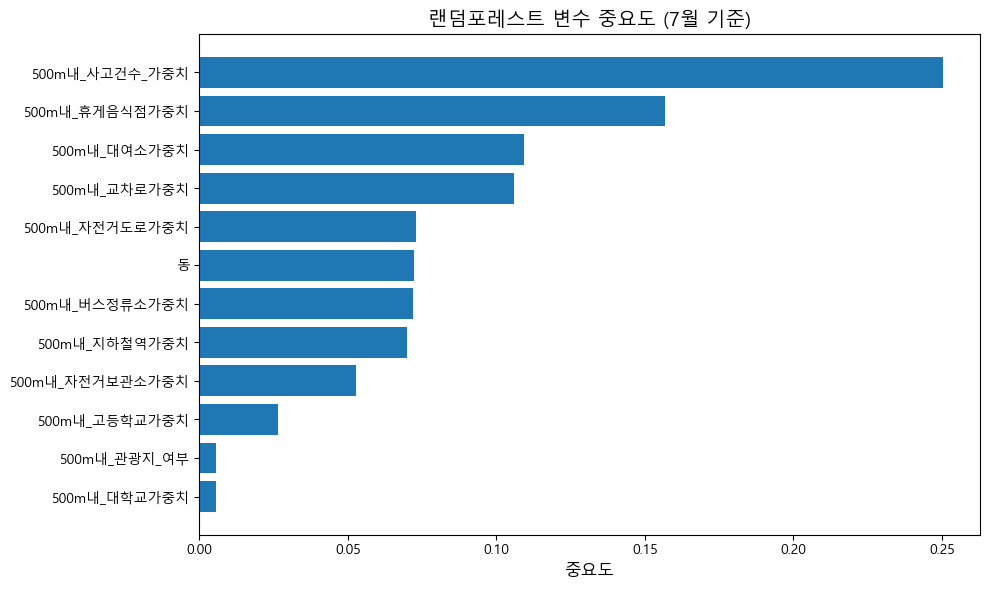

In [9]:
#변수 중요도 시각화 : 랜덤포레스트 기반
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원', '평균_사용인원']
df_jul  = df_jul[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '평균_사용인원','대여소_ID']]
df_merge = pd.merge(df_jul, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

feature_cols = ['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']

X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=300)
rf.fit(X, Y)


importances = rf.feature_importances_
indices = importances.argsort()[::-1]
sorted_features = [feature_cols[i] for i in indices]


plt.figure(figsize=(10, 6))
plt.barh(sorted_features[::-1], importances[indices][::-1])
plt.title("랜덤포레스트 변수 중요도 (7월 기준)", fontsize=14)
plt.xlabel("중요도", fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
#변수 중요도 기반 입지 평가 지표(5월)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원', '평균_사용인원']
df_may  = df_may[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '평균_사용인원','대여소_ID']]
df_merge = pd.merge(df_may, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

feature_cols = ['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']

X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

importances = rf.feature_importances_
importance_dict = dict(zip(feature_cols, importances))


df_merge['입지_스코어'] = X.apply(lambda row: sum(row[col] * importance_dict[col] for col in feature_cols), axis=1)


top_sites = df_merge[['대여소_ID', '입지_스코어', '평균_사용인원']].sort_values(by='입지_스코어', ascending=False)
print(top_sites.head(10))

       대여소_ID     입지_스코어     평균_사용인원
1661  ST-2520  57.077276   65.652174
2609  ST-1668  55.470067  209.043478
2488  ST-1777  55.220826   63.565217
1659  ST-2522  54.368412   40.347826
560    ST-493  53.717327  566.666667
2489  ST-1776  52.281394   35.739130
1426  ST-2732  52.213904  225.166667
2950   ST-136  52.180973  136.608696
175    ST-840  51.061579  329.666667
2939   ST-137  51.037414  102.000000


In [11]:
top_sites.to_csv('5월_입지스코어_상위10.csv', index=False, encoding='utf-8-sig')

In [12]:
#상위 10개 대여소 위치를 지도에 시각화(5월)
import pandas as pd

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding='cp949')

top_ids = ['ST-2520', 'ST-1668', 'ST-1777', 'ST-2522', 'ST-493',
           'ST-1776', 'ST-2732', 'ST-136', 'ST-840', 'ST-137']

locations = df_merge[df_merge['대여소_ID'].isin(top_ids)][['대여소_ID', '위도', '경도']]

score_df = pd.DataFrame({
    '대여소_ID': top_ids,
    '입지_스코어': [57.077276, 55.470067, 55.220826, 54.368412, 53.717327,
                    52.281394, 52.213904, 52.180973, 51.061579, 51.037414],
    '평균_사용인원': [65.652174, 209.043478, 63.565217, 40.347826, 566.666667,
                     35.739130, 225.166667, 136.608696, 329.666667, 102.000000]
})


merged_df = pd.merge(score_df, locations, on='대여소_ID')


merged_df.to_csv('5월_입지스코어_상위10_위치포함.csv', index=False, encoding='utf-8-sig')

In [13]:
#Folium 코드
import folium
top10_may = pd.read_csv('5월_입지스코어_상위10_위치포함.csv')

map_center = [top10_may['위도'].mean(), top10_may['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

for idx, row in top10_may.iterrows():
    popup_text = f"ID: {row['대여소_ID']}<br>입지스코어: {row['입지_스코어']:.2f}<br>평균 사용인원: {row['평균_사용인원']:.2f}"
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='bicycle', prefix='fa')
    ).add_to(m)

m.save('5월_입지스코어_상위10_지도.html')

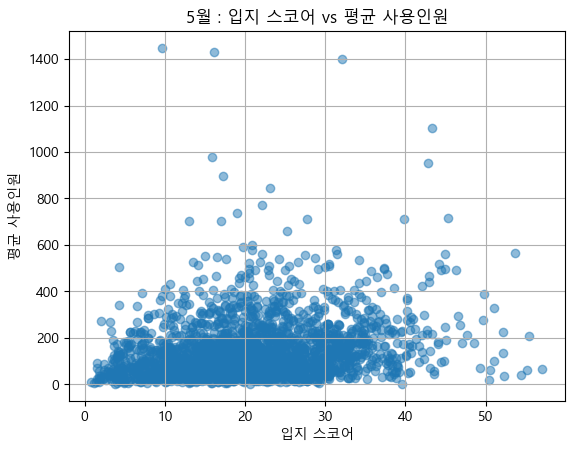

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df_merge['입지_스코어'], df_merge['평균_사용인원'], alpha=0.5)
plt.title('5월 : 입지 스코어 vs 평균 사용인원')
plt.xlabel('입지 스코어')
plt.ylabel('평균 사용인원')
plt.grid(True)
plt.show()

In [15]:
#변수 중요도 기반 입지 평가 지표(3월)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원', '평균_사용인원']
df_mar  = df_mar[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '평균_사용인원','대여소_ID']]
df_merge = pd.merge(df_mar, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

feature_cols = ['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

importances = rf.feature_importances_
importance_dict = dict(zip(feature_cols, importances))


df_merge['입지_스코어'] = X.apply(lambda row: sum(row[col] * importance_dict[col] for col in feature_cols), axis=1)


top_sites = df_merge[['대여소_ID', '입지_스코어', '평균_사용인원']].sort_values(by='입지_스코어', ascending=False)
print(top_sites.head(10))

       대여소_ID     입지_스코어     평균_사용인원
1661  ST-2520  58.077284   38.916667
2609  ST-1668  56.442565  113.333333
2488  ST-1777  56.325184   44.000000
1659  ST-2522  55.413655   22.500000
560    ST-493  54.736618  329.478261
2489  ST-1776  53.337304   25.666667
1426  ST-2732  53.247722  122.521739
2950   ST-136  53.108986   93.916667
175    ST-840  52.031499  183.090909
2939   ST-137  51.954760   76.750000


In [16]:
top_sites.to_csv('3월_입지스코어_상위10.csv', index=False, encoding='utf-8-sig')

In [17]:
#상위 10개 대여소 위치를 지도에 시각화(3월)
filepath_mar = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath_mar, encoding='cp949')

top_ids = ['ST-2520', 'ST-1668', 'ST-1777', 'ST-2522', 'ST-493',
           'ST-1776', 'ST-2732', 'ST-136', 'ST-840', 'ST-137']

locations = df_merge[df_merge['대여소_ID'].isin(top_ids)][['대여소_ID', '위도', '경도']]

score_df = pd.DataFrame({
    '대여소_ID': top_ids,
    '입지_스코어': [58.077284, 56.442565, 56.325184, 55.413655, 54.736618,
                    53.337304, 53.247722, 53.108986, 52.031499, 51.954760],
    '평균_사용인원': [38.916667, 113.333333, 44.000000, 22.500000, 329.478261,
                     25.666667, 122.521739, 93.916667, 183.090909, 76.750000]
})

merged_df = pd.merge(score_df, locations, on='대여소_ID')
merged_df.to_csv('3월_입지스코어_상위10_위치포함.csv', index=False, encoding='utf-8-sig')

In [18]:
!pip install folium

In [19]:
#Folium 코드
import folium
top10_march = pd.read_csv('3월_입지스코어_상위10_위치포함.csv')

map_center = [top10_march['위도'].mean(), top10_march['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

for idx, row in top10_march.iterrows():
    popup_text = f"ID: {row['대여소_ID']}<br>입지스코어: {row['입지_스코어']:.2f}<br>평균 사용인원: {row['평균_사용인원']:.2f}"
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='bicycle', prefix='fa')
    ).add_to(m)

m.save('3월_입지스코어_상위10_지도.html')

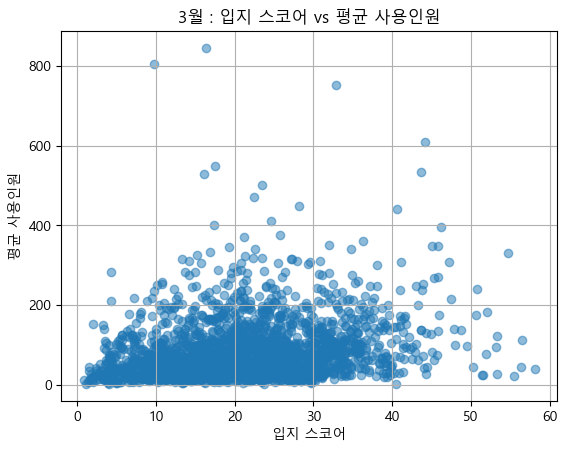

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df_merge['입지_스코어'], df_merge['평균_사용인원'], alpha=0.5)
plt.title('3월 : 입지 스코어 vs 평균 사용인원')
plt.xlabel('입지 스코어')
plt.ylabel('평균 사용인원')
plt.grid(True)
plt.show()

In [21]:
#변수 중요도 기반 입지 평가 지표(3월)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원', '평균_사용인원']
df_mar  = df_mar[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '평균_사용인원','대여소_ID']]
df_merge = pd.merge(df_mar, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

feature_cols = ['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']


X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

importances = rf.feature_importances_
importance_dict = dict(zip(feature_cols, importances))


df_merge['입지_스코어'] = X.apply(lambda row: sum(row[col] * importance_dict[col] for col in feature_cols), axis=1)


top_sites = df_merge[['대여소_ID', '입지_스코어', '평균_사용인원']].sort_values(by='입지_스코어', ascending=False)
print(top_sites.head(10))

       대여소_ID     입지_스코어     평균_사용인원
1661  ST-2520  58.077284   38.916667
2609  ST-1668  56.442565  113.333333
2488  ST-1777  56.325184   44.000000
1659  ST-2522  55.413655   22.500000
560    ST-493  54.736618  329.478261
2489  ST-1776  53.337304   25.666667
1426  ST-2732  53.247722  122.521739
2950   ST-136  53.108986   93.916667
175    ST-840  52.031499  183.090909
2939   ST-137  51.954760   76.750000


In [22]:
#변수 중요도 기반 입지 평가 지표(7월)

import pandas as pd
from sklearn.ensemble import RandomForestRegressor

filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding="cp949")
weight_data = pd.read_csv('result_data_file.csv',encoding="cp949")

merge_cols=['대여소_ID', '총_사용인원', '평균_사용인원']
df_jul  = df_jul[merge_cols]

weight_cols = [col for col in weight_data.columns if col not in ['총_사용인원', '평균_사용인원','대여소_ID']]
df_merge = pd.merge(df_jul, weight_data[['대여소_ID'] + weight_cols], on='대여소_ID', how='left')

feature_cols = ['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치', '500m내_대학교가중치', '500m내_사고건수_가중치','동','500m내_관광지_여부', '500m내_휴게음식점가중치']



X = df_merge[feature_cols]
Y = df_merge['평균_사용인원']


data = pd.concat([X, Y], axis=1)
data = data.dropna()


X = data[feature_cols]
Y = data['평균_사용인원']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

importances = rf.feature_importances_
importance_dict = dict(zip(feature_cols, importances))


df_merge['입지_스코어'] = X.apply(lambda row: sum(row[col] * importance_dict[col] for col in feature_cols), axis=1)


top_sites = df_merge[['대여소_ID', '입지_스코어', '평균_사용인원']].sort_values(by='입지_스코어', ascending=False)
print(top_sites.head(10))

       대여소_ID     입지_스코어     평균_사용인원
1661  ST-2520  63.286267   26.727273
2488  ST-1777  62.481565   27.636364
2609  ST-1668  61.561686   87.636364
1659  ST-2522  61.160766   13.636364
2489  ST-1776  59.303059   13.454545
560    ST-493  58.898765  205.000000
2950   ST-136  58.104370   59.636364
1426  ST-2732  57.459571   92.500000
2490  ST-1775  57.364846   13.818182
2939   ST-137  56.916178   42.909091


In [23]:
top_sites.to_csv('7월_입지스코어_상위10.csv', index=False, encoding='utf-8-sig')

In [24]:
#상위 10개 대여소 위치를 지도에 시각화(7월)
filepath_jul = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath_jul, encoding='cp949')

top_ids = ['ST-2520', 'ST-1777', 'ST-1668', 'ST-2522', 'ST-1776',
           'ST-493', 'ST-136', 'ST-2732', 'ST-1775', 'ST-137']

locations = df_merge[df_merge['대여소_ID'].isin(top_ids)][['대여소_ID', '위도', '경도']]

score_df = pd.DataFrame({
    '대여소_ID': top_ids,
    '입지_스코어': [63.286267, 62.481565, 61.561686, 61.160766, 59.303059,
                    58.898765, 58.104370, 57.459571, 57.364846, 56.916178],
    '평균_사용인원': [26.727273, 27.636364, 87.636364, 13.636364, 13.454545,
                    205.000000, 59.636364, 92.500000, 13.818182, 42.909091]
})

merged_df = pd.merge(score_df, locations, on='대여소_ID')
merged_df.to_csv('7월_입지스코어_상위10_위치포함.csv', index=False, encoding='utf-8-sig')

In [25]:
#Folium 코드
import folium
top10_july = pd.read_csv('7월_입지스코어_상위10_위치포함.csv')

map_center = [top10_july['위도'].mean(), top10_july['경도'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

for idx, row in top10_july.iterrows():
    popup_text = f"ID: {row['대여소_ID']}<br>입지스코어: {row['입지_스코어']:.2f}<br>평균 사용인원: {row['평균_사용인원']:.2f}"
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='bicycle', prefix='fa')
    ).add_to(m)

m.save('7월_입지스코어_상위10_지도.html')

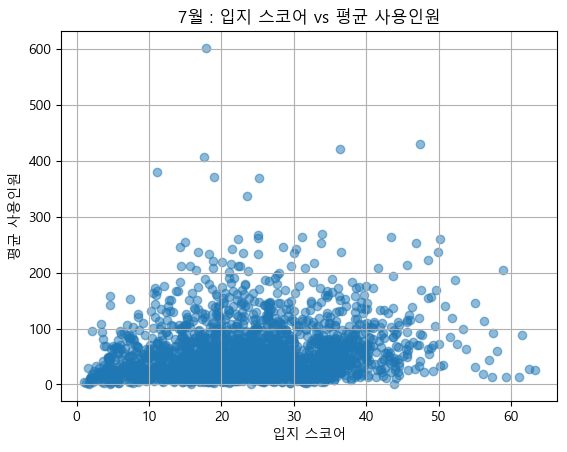

In [26]:
import matplotlib.pyplot as plt

plt.scatter(df_merge['입지_스코어'], df_merge['평균_사용인원'], alpha=0.5)
plt.title('7월 : 입지 스코어 vs 평균 사용인원')
plt.xlabel('입지 스코어')
plt.ylabel('평균 사용인원')
plt.grid(True)
plt.show()

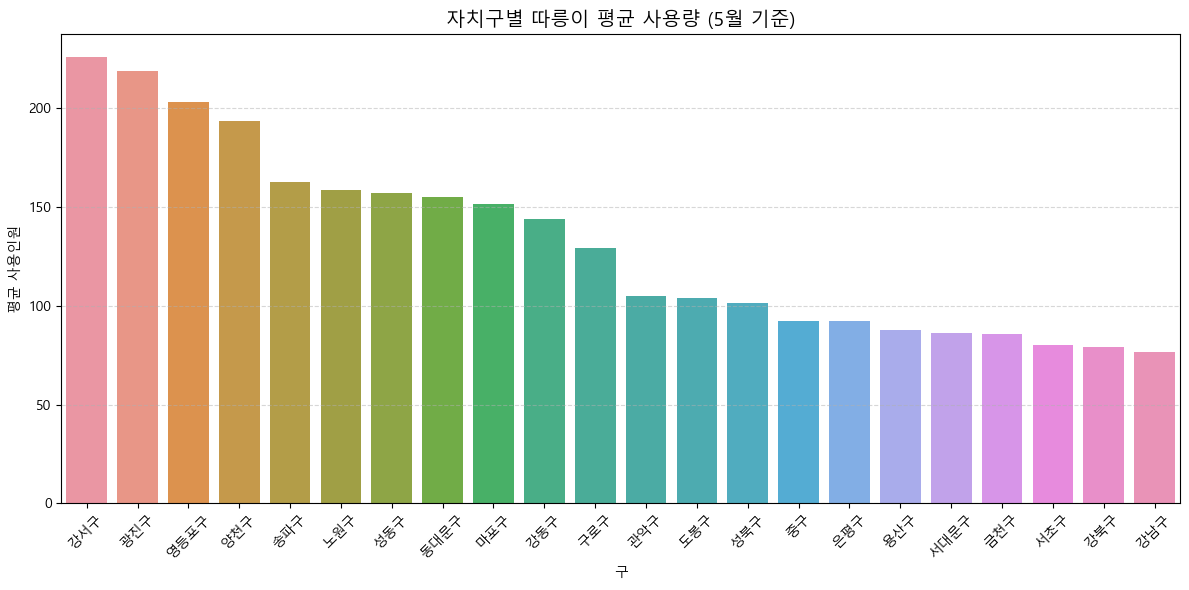

In [27]:
#자치구별 평균 사용량 막대그래프(5월)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join(extract_path, 'mainMay.csv')
df_may = pd.read_csv(filepath, encoding='cp949')

df_may = df_may.dropna(subset=['구', '평균_사용인원'])

df_may = df_may[df_may['구'] != '분당구']

gu_avg = df_may.groupby('구')['평균_사용인원'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gu_avg.index, y=gu_avg.values)
plt.title('자치구별 따릉이 평균 사용량 (5월 기준)', fontsize=14)
plt.ylabel('평균 사용인원')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

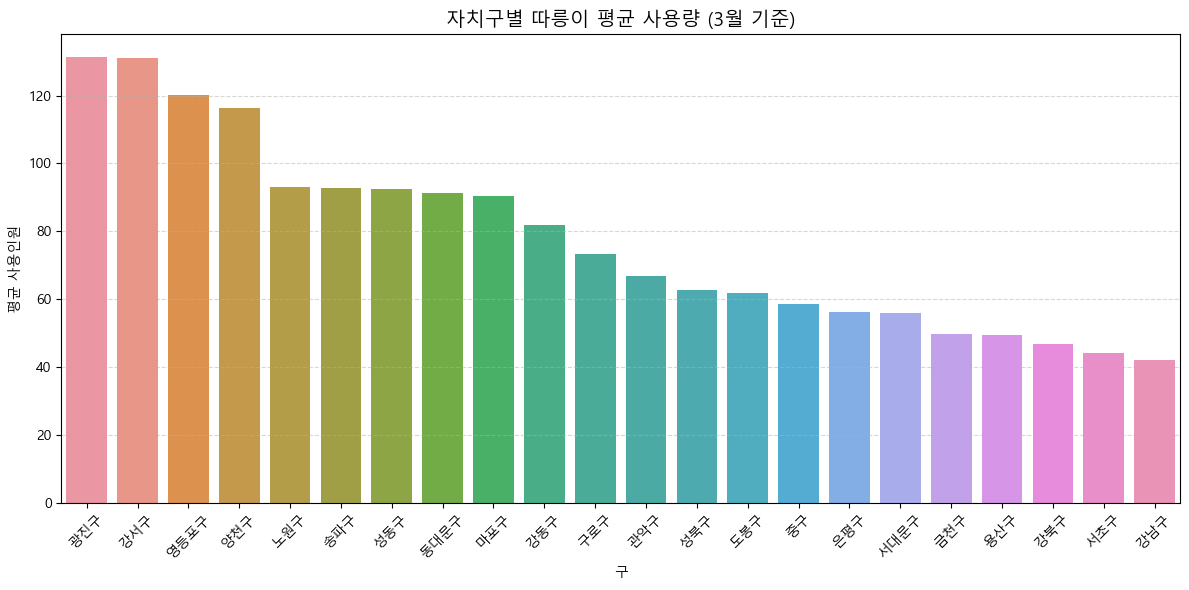

In [28]:
#자치구별 평균 사용량 막대그래프(3월)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join(extract_path, 'mainMar.csv')
df_mar = pd.read_csv(filepath, encoding='cp949')

df_mar = df_mar.dropna(subset=['구', '평균_사용인원'])

df_mar = df_mar[df_mar['구'] != '분당구']

gu_avg = df_mar.groupby('구')['평균_사용인원'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gu_avg.index, y=gu_avg.values)
plt.title('자치구별 따릉이 평균 사용량 (3월 기준)', fontsize=14)
plt.ylabel('평균 사용인원')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

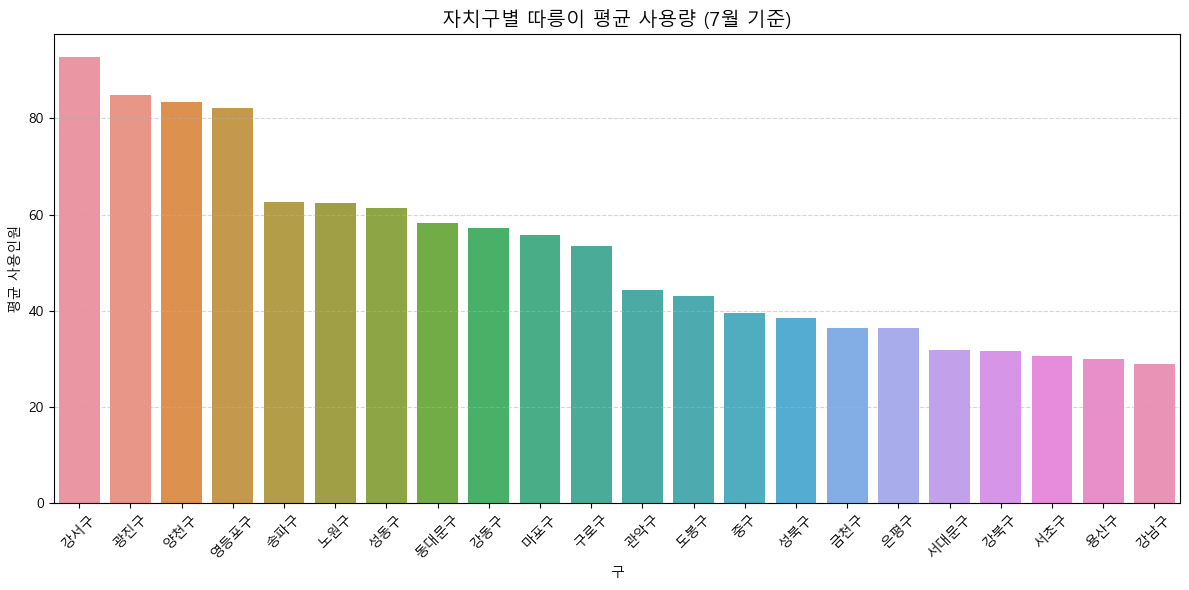

In [29]:
#자치구별 평균 사용량 막대그래프(7월)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

filepath = os.path.join(extract_path, 'mainJul.csv')
df_jul = pd.read_csv(filepath, encoding='cp949')

df_jul = df_jul.dropna(subset=['구', '평균_사용인원'])

df_jul = df_jul[df_jul['구'] != '분당구']

gu_avg = df_jul.groupby('구')['평균_사용인원'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=gu_avg.index, y=gu_avg.values)
plt.title('자치구별 따릉이 평균 사용량 (7월 기준)', fontsize=14)
plt.ylabel('평균 사용인원')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()